In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras



In [2]:
print(tf.__version__) 

2.17.1


In [3]:

from keras import layers, losses
from keras.datasets import fashion_mnist
from keras.models import Model


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [5]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


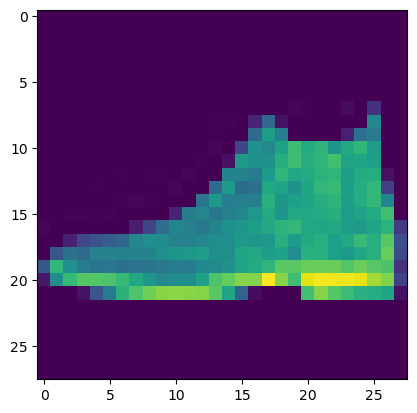

In [6]:
plt.imshow(x_test[0])

In [7]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [8]:
shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [11]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Epoch 1/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 2/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 3/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6943 - val_loss: 0.6941
Epoch 4/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 5/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 6/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 7/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 8/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6935 - val_loss: 0.6933
Epoch 9/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 10/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6932 - val_loss: 0.6930
Epoch 11/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 12/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

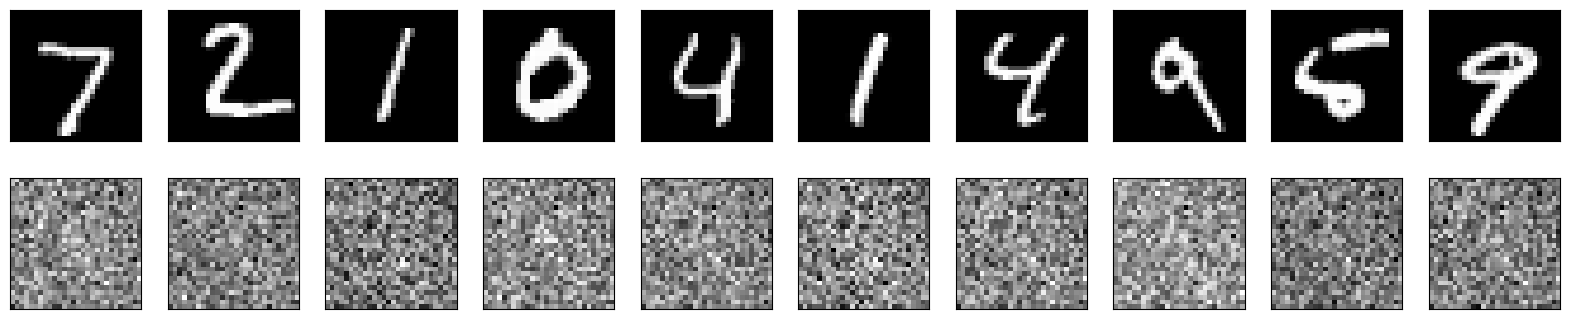

In [9]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# encoderの次元
encoding_dim = 32

# 入力用の変数
input_img = Input(shape=(784, ))
# 入力された画像がencodeされたものを格納する変数
encoded = Dense(encoding_dim, activation='relu')(input_img)
# ecnodeされたデータを再構成した画像を格納する変数
decoded = Dense(784, activation='sigmoid')(encoded)
# 入力画像を再構成するModelとして定義
autoencoder = Model(input_img, decoded)

# 入力する画像をencodeする部分
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim, ))
decoder_layer = autoencoder.layers[-1]
# encodeされた画像データを再構成する部分
decoder = Model(encoded_input, decoder_layer(encoded_input))

# AdaDeltaで最適化, loss関数はbinary_crossentropy
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# MNISTデータを前処理する
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_valid = train_test_split(x_train, test_size=0.175)
x_train = x_train.astype('float32')/255.
x_valid = x_valid.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_valid = x_valid.reshape((len(x_valid), np.prod(x_valid.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# autoencoderの実行
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_valid, x_valid))

# 画像化して確認
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import mnist
from keras.models import Model


def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """Adds random noise to each image in the supplied array."""
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

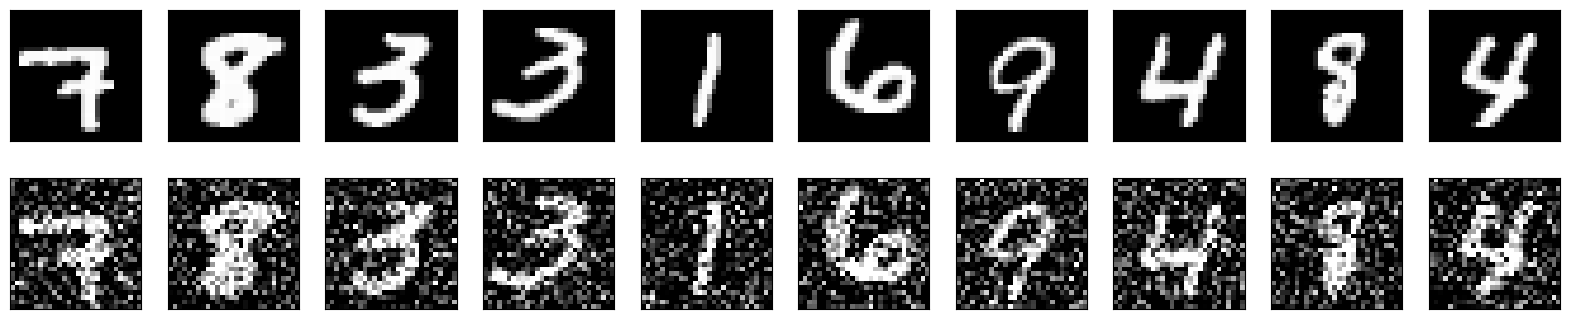

In [11]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)